## Testing changes in scores when computing Spec2vec similarity score many times

To taste is Spec2Vec similarity scores vary every time it is executed, here executed 10 times and compared with Cosine score

**The filtering used for this experiment is select_by_relative_intensity with intensity_from=0.01**

## Obtaining the data from the Mona File

## Getting the path for Mona file

Using the method load_from_msp, the information inside the Mona file is being obtained.

In [18]:
import os
import sys

ROOT = os.path.dirname(os.getcwd())
sys.path.insert(0, ROOT)

In [19]:
from custom_functions.spectra_functions import get_data_folder_path

path = get_data_folder_path()

/Users/efra/../../Volumes/easystore/spec2vec_gcms_data_analysis/data


In [34]:
import matplotlib.pyplot as plt

def plot_similarity_algorithms_performance(show_top_percentile, percentile_cosine_nist, percentile_cosine_massbank, percentile_cosine_demuth, percentile_cosine_spec2vec):
    ## Code inspired by Florian Huber's jupyter notebook to plot a graph comparing all similarity meaasures
    ## https://github.com/iomega/spec2vec_gnps_data_analysis/blob/master/notebooks/iomega-7-compare-the-different-scores.ipynb
    
    num_bins = 1000

    plt.style.use('ggplot')
    fig, ax = plt.subplots(figsize=(7,6))

    x_percentiles = (show_top_percentile / num_bins * (1 + np.arange(num_bins)))[::-1]

    plt.plot(x_percentiles, percentile_cosine_nist,
             color="black", label="1) Cosine Greedy - NIST")
    plt.plot(x_percentiles, percentile_cosine_massbank,
             color="blue", label="2) Cosine Greedy - MassBank")
    plt.plot(x_percentiles, percentile_cosine_demuth,
             color="green", label="3) Cosine Greedy - Demuth")
    plt.plot(x_percentiles, percentile_cosine_spec2vec,
             color="red", label="4) Spec2vec")


    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.xticks(np.linspace(0, show_top_percentile, 5), 
              ["{:.2f}%".format(x) for x in np.linspace(0, show_top_percentile, 5)])
    plt.legend()
    plt.xlabel("Top percentile of spectral similarity score g(s1,s2)", fontsize=13)
    plt.ylabel("Mean molecular similarity f(m1,m2) \n (within respective percentile)", fontsize=13)
    plt.xlim(0, show_top_percentile)
    plt.ylim(0.25, 1)
    plt.show()

## Loading previously computed Cosine Score with NIST Powers

In [21]:
import numpy as np

filename = os.path.join(path,'similarities_filter05_cosine_tol05_mzp3_intp06.npy')
matrix_similarities_nist = np.load(filename)

print("Matrix dimension", matrix_similarities_nist.shape)

Matrix dimension (14844, 14844)


## Loading previously computed Tanimoto Score

In [22]:
filename = os.path.join(path, "gcms_similarities_filter05_morgan3_2048_dice.npy")
matrix_similarities_tanimoto = np.load(filename)

print("Matrix dimension", matrix_similarities_tanimoto.shape)

Matrix dimension (14844, 14844)


## Loading previously computed Cosine Score with MassBank Powers

In [23]:
filename = os.path.join(path,'similarities_filt05_cosine_tol05_mzp2_intp05.npy')
matrix_similarities_massbank = np.load(filename)

print("Matrix dimension", matrix_similarities_massbank.shape)

Matrix dimension (14844, 14844)


## Loading previously computed Cosine Score with Demuth Powers

In [24]:
filename = os.path.join(path,'similarities_filt05_cosine_tol05_mzp0_intp033.npy')
matrix_similarities_demuth = np.load(filename)

print("Matrix dimension", matrix_similarities_demuth.shape)

Matrix dimension (14844, 14844)


## Appliying filters to the spectra

Applied filters are:
* normalize_intensities(s)
* select_by_mz(s, mz_from=0, mz_to=1000)
* select_by_relative_intensity(s, intensity_from=0.01, intensity_to=1.0)

In [25]:
from matchms.importing import load_from_msp

spectrums = [s for s in load_from_msp(msp_file)]
print("Number of Spectra:", len(spectrums))

Number of Spectra: 14847


In [26]:
from matchms.filtering import normalize_intensities
from matchms.filtering import select_by_mz
from matchms.filtering import select_by_relative_intensity

def apply_my_filters(s):
    s = normalize_intensities(s)
    s = select_by_mz(s, mz_from=0, mz_to=1000)
    s = select_by_relative_intensity(s, intensity_from=0.01, intensity_to=1.0)
    return s

spectrums = [apply_my_filters(s) for s in spectrums]

spectrums = [s for s in spectrums if s is not None]

#Filter spectra with peak intensities length equals or less than zero
spectrums = [s for s in spectrums if len(s.peaks.intensities) > 0]

print("Number of Spectra:", len(spectrums))

Number of Spectra: 14844


## Converting Spectrum objects to Spectrum Documents

In [27]:
from spec2vec import SpectrumDocument

reference_documents = [SpectrumDocument(s) for s in spectrums]

query_documents = reference_documents.copy()

## Training the word2vec model

Data used for training the model:\
**Iterarions=10, 20, 30**\
**Workers=2**

Once the model is trained the file "references.model" is stored for further use in the score calculation

## Computing Spec2Vec similarity scores 10 times

Iteration 1
The value of size is set from 300 (default) to 650
The value of workers is set from 4 (default) to 2
Saving model with name: /Users/efra/../../Volumes/easystore/spec2vec_gcms_data_analysis/data/testing-references_iter_10.model
Saving model with name: /Users/efra/../../Volumes/easystore/spec2vec_gcms_data_analysis/data/testing-references_iter_20.model
Saving model with name: /Users/efra/../../Volumes/easystore/spec2vec_gcms_data_analysis/data/testing-references.model


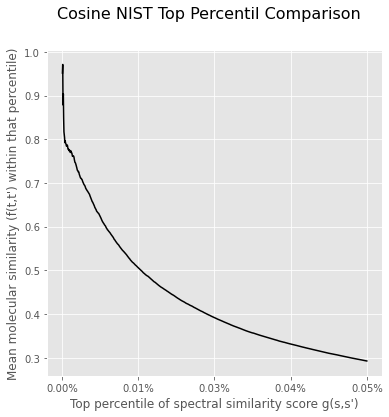

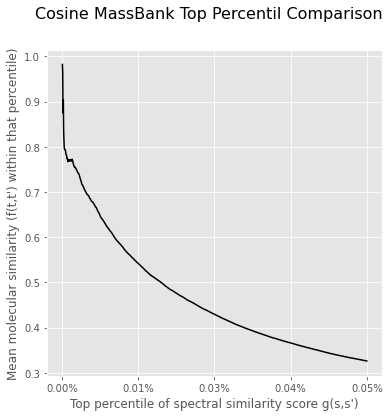

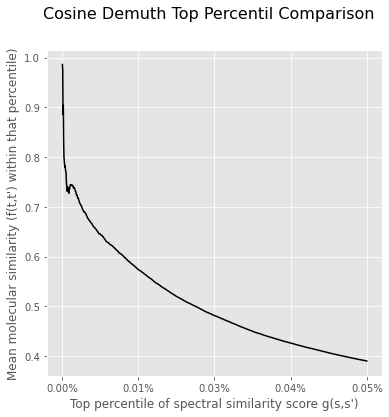

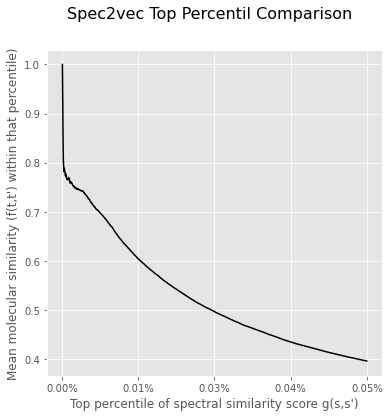

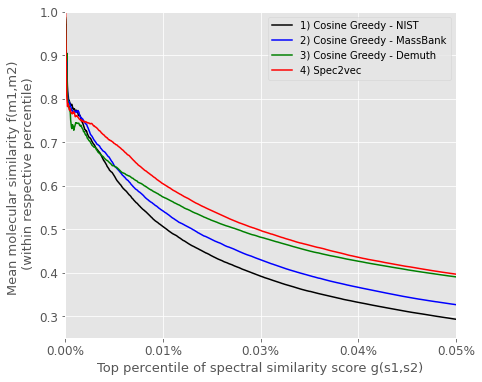

Iteration 2
The value of size is set from 300 (default) to 650
The value of workers is set from 4 (default) to 2
Saving model with name: /Users/efra/../../Volumes/easystore/spec2vec_gcms_data_analysis/data/testing-references_iter_10.model
Saving model with name: /Users/efra/../../Volumes/easystore/spec2vec_gcms_data_analysis/data/testing-references_iter_20.model
Saving model with name: /Users/efra/../../Volumes/easystore/spec2vec_gcms_data_analysis/data/testing-references.model


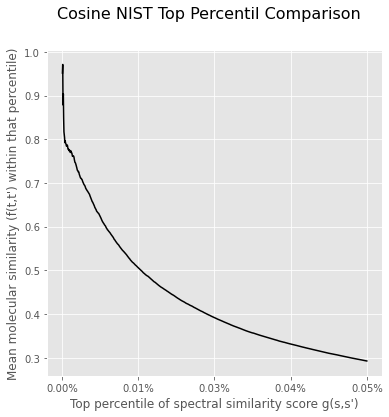

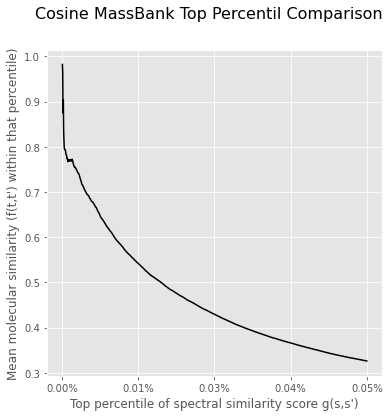

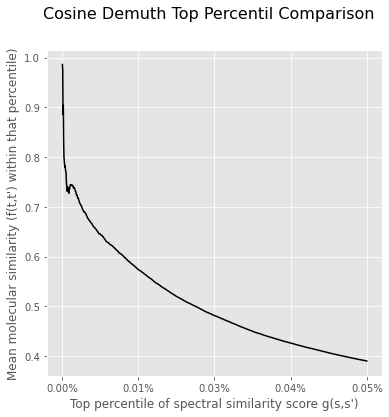

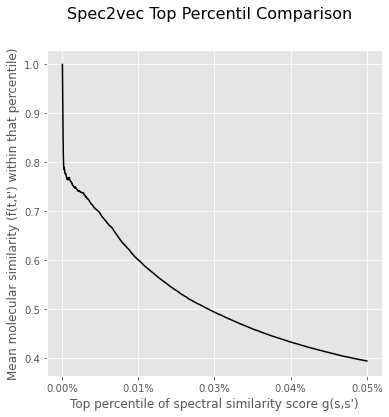

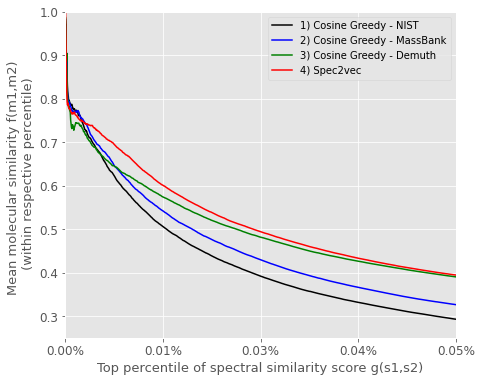

Iteration 3
The value of size is set from 300 (default) to 650
The value of workers is set from 4 (default) to 2
Saving model with name: /Users/efra/../../Volumes/easystore/spec2vec_gcms_data_analysis/data/testing-references_iter_10.model
Saving model with name: /Users/efra/../../Volumes/easystore/spec2vec_gcms_data_analysis/data/testing-references_iter_20.model
Saving model with name: /Users/efra/../../Volumes/easystore/spec2vec_gcms_data_analysis/data/testing-references.model


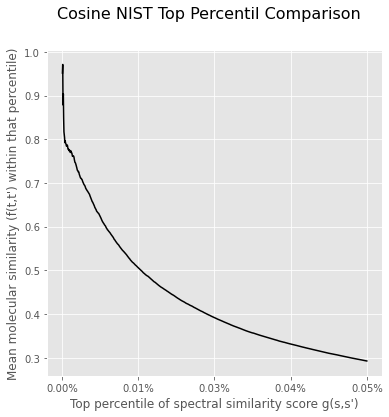

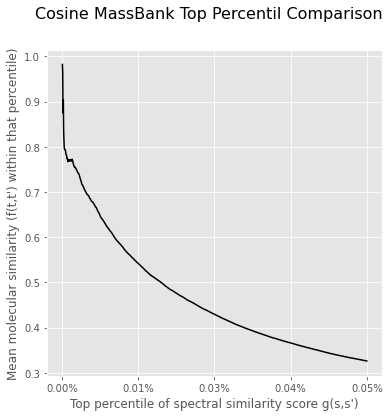

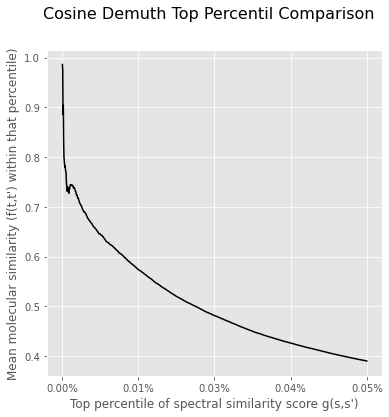

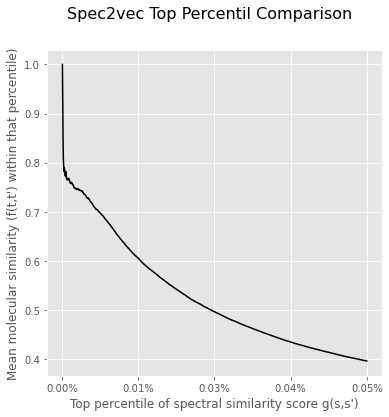

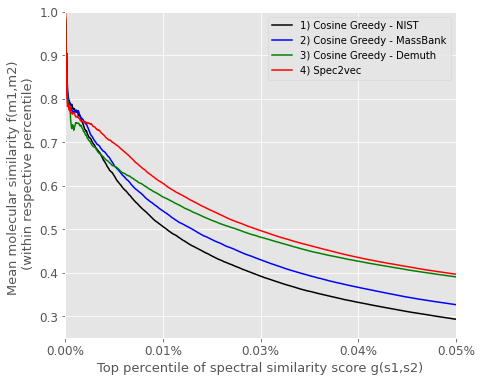

Iteration 4
The value of size is set from 300 (default) to 650
The value of workers is set from 4 (default) to 2
Saving model with name: /Users/efra/../../Volumes/easystore/spec2vec_gcms_data_analysis/data/testing-references_iter_10.model
Saving model with name: /Users/efra/../../Volumes/easystore/spec2vec_gcms_data_analysis/data/testing-references_iter_20.model
Saving model with name: /Users/efra/../../Volumes/easystore/spec2vec_gcms_data_analysis/data/testing-references.model


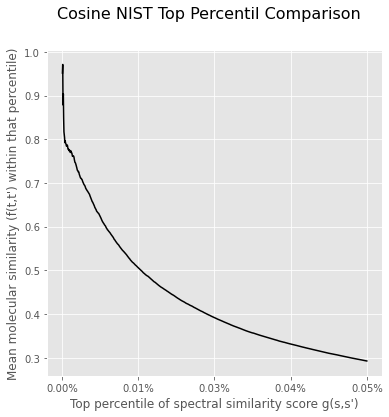

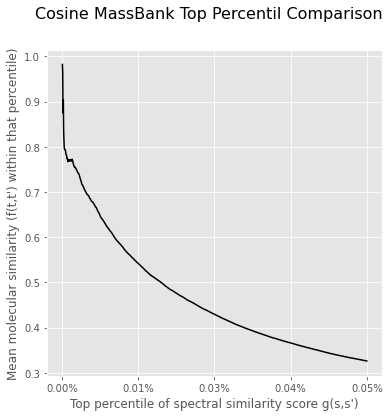

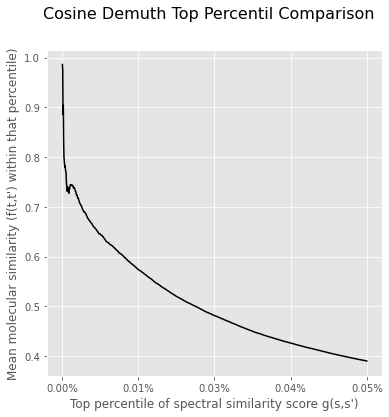

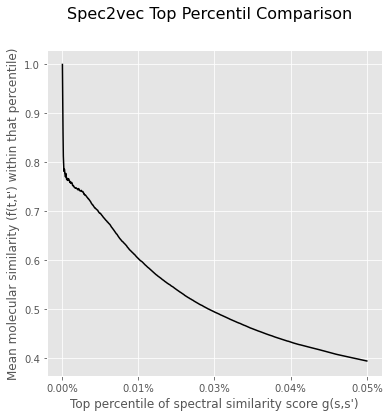

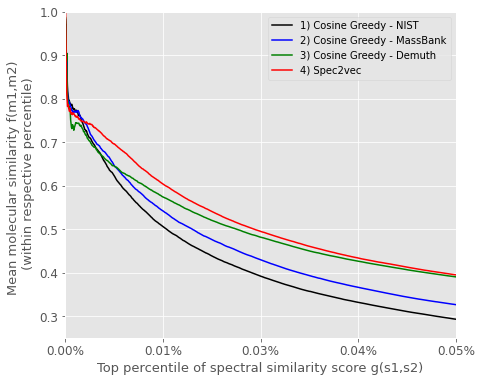

Iteration 5
The value of size is set from 300 (default) to 650
The value of workers is set from 4 (default) to 2
Saving model with name: /Users/efra/../../Volumes/easystore/spec2vec_gcms_data_analysis/data/testing-references_iter_10.model
Saving model with name: /Users/efra/../../Volumes/easystore/spec2vec_gcms_data_analysis/data/testing-references_iter_20.model
Saving model with name: /Users/efra/../../Volumes/easystore/spec2vec_gcms_data_analysis/data/testing-references.model


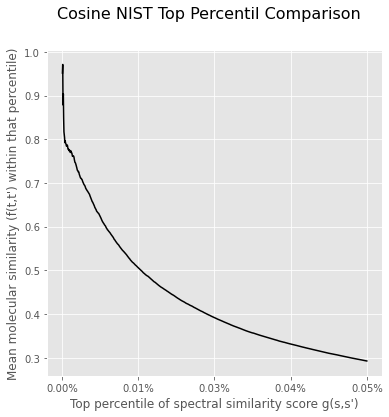

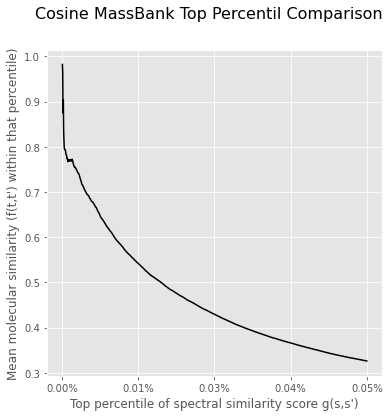

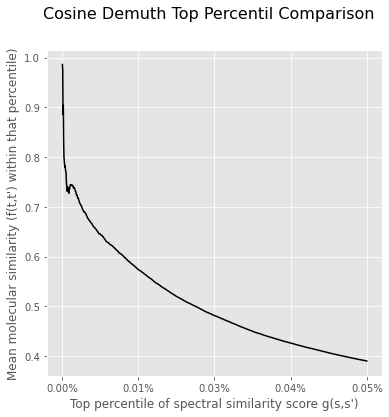

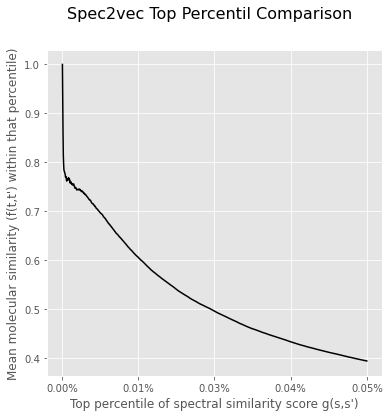

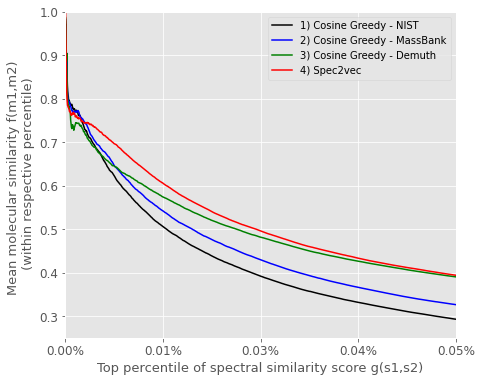

Iteration 6
The value of size is set from 300 (default) to 650
The value of workers is set from 4 (default) to 2
Saving model with name: /Users/efra/../../Volumes/easystore/spec2vec_gcms_data_analysis/data/testing-references_iter_10.model
Saving model with name: /Users/efra/../../Volumes/easystore/spec2vec_gcms_data_analysis/data/testing-references_iter_20.model
Saving model with name: /Users/efra/../../Volumes/easystore/spec2vec_gcms_data_analysis/data/testing-references.model


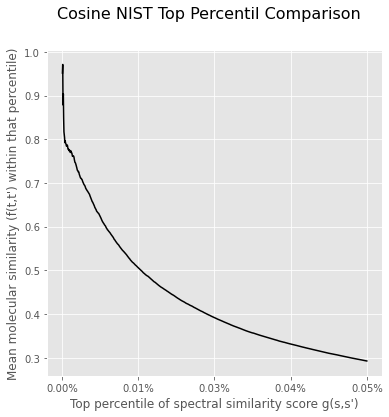

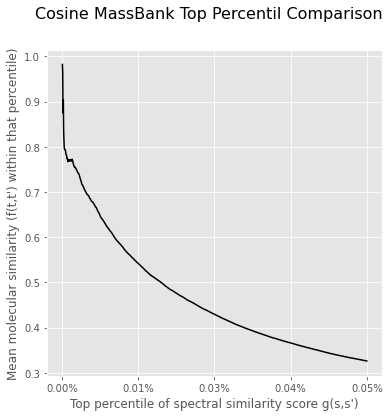

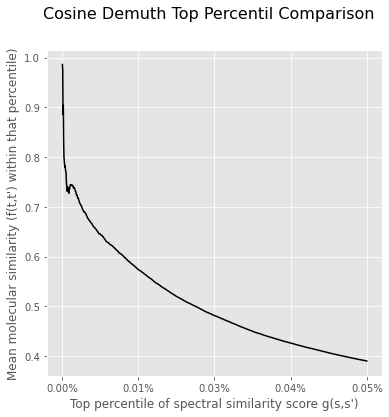

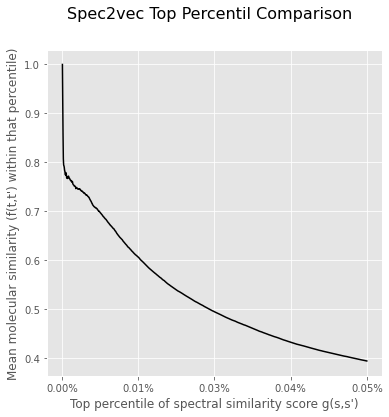

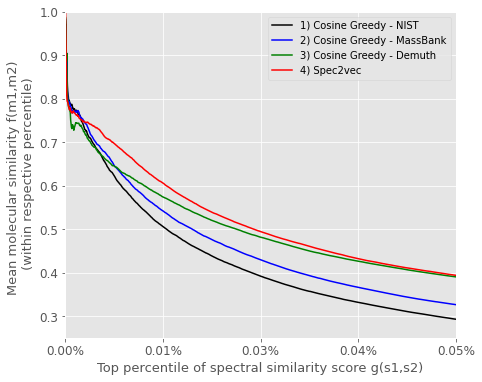

Iteration 7
The value of size is set from 300 (default) to 650
The value of workers is set from 4 (default) to 2
Saving model with name: /Users/efra/../../Volumes/easystore/spec2vec_gcms_data_analysis/data/testing-references_iter_10.model
Saving model with name: /Users/efra/../../Volumes/easystore/spec2vec_gcms_data_analysis/data/testing-references_iter_20.model
Saving model with name: /Users/efra/../../Volumes/easystore/spec2vec_gcms_data_analysis/data/testing-references.model


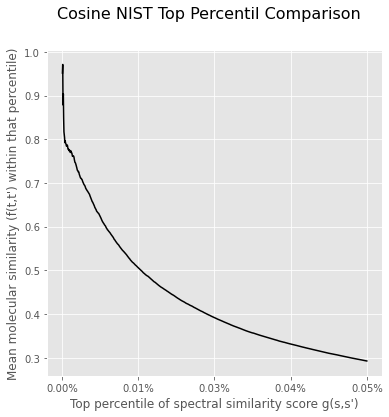

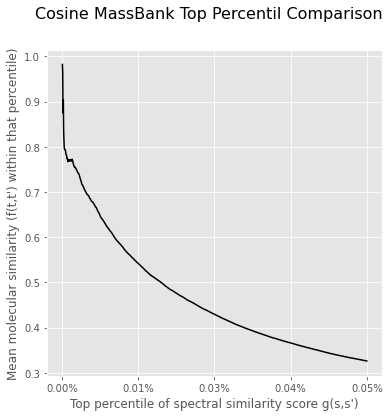

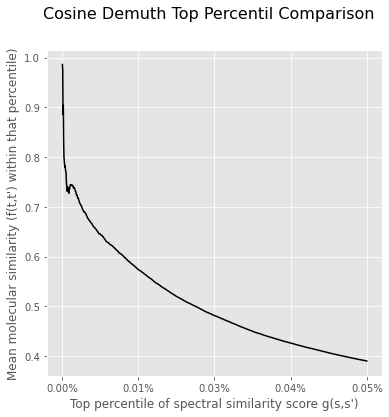

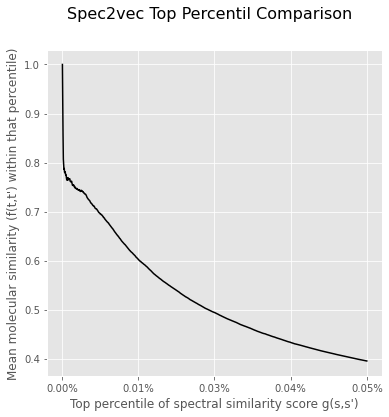

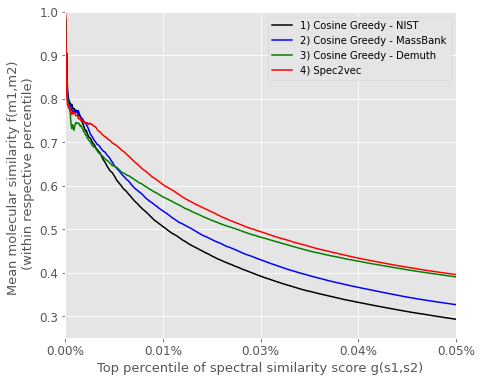

Iteration 8
The value of size is set from 300 (default) to 650
The value of workers is set from 4 (default) to 2
Saving model with name: /Users/efra/../../Volumes/easystore/spec2vec_gcms_data_analysis/data/testing-references_iter_10.model
Saving model with name: /Users/efra/../../Volumes/easystore/spec2vec_gcms_data_analysis/data/testing-references_iter_20.model
Saving model with name: /Users/efra/../../Volumes/easystore/spec2vec_gcms_data_analysis/data/testing-references.model


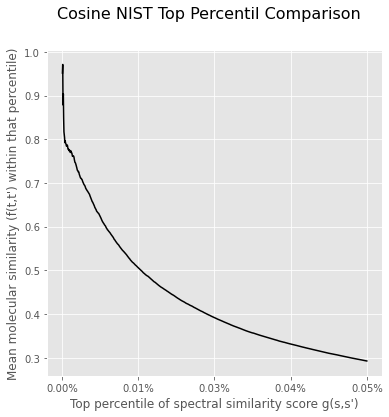

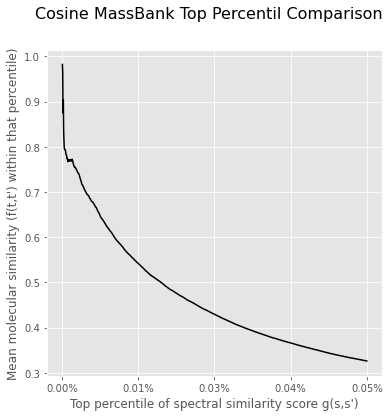

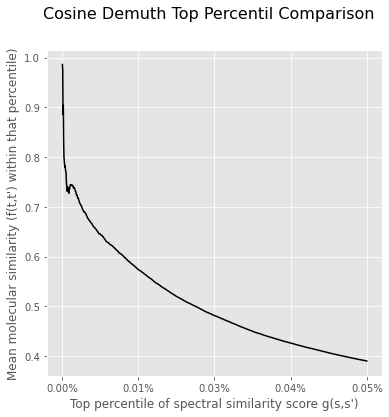

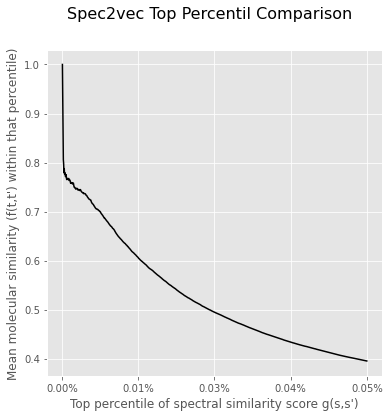

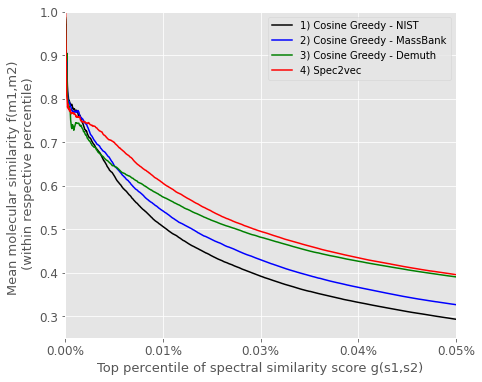

Iteration 9
The value of size is set from 300 (default) to 650
The value of workers is set from 4 (default) to 2
Saving model with name: /Users/efra/../../Volumes/easystore/spec2vec_gcms_data_analysis/data/testing-references_iter_10.model
Saving model with name: /Users/efra/../../Volumes/easystore/spec2vec_gcms_data_analysis/data/testing-references_iter_20.model
Saving model with name: /Users/efra/../../Volumes/easystore/spec2vec_gcms_data_analysis/data/testing-references.model


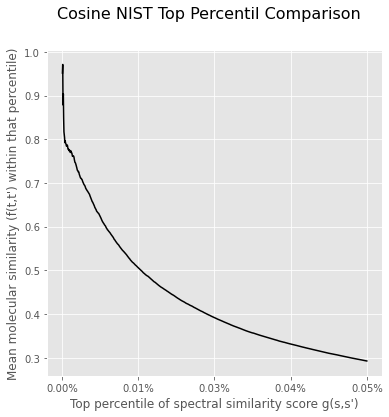

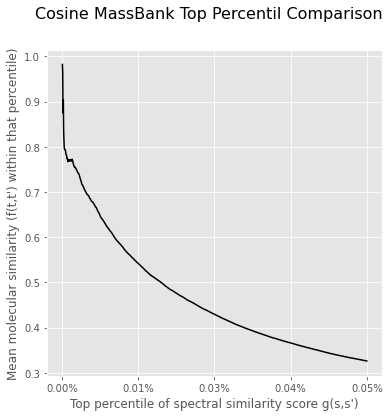

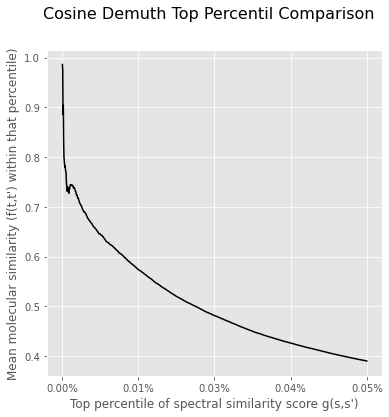

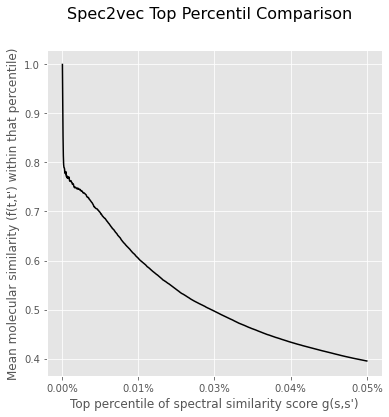

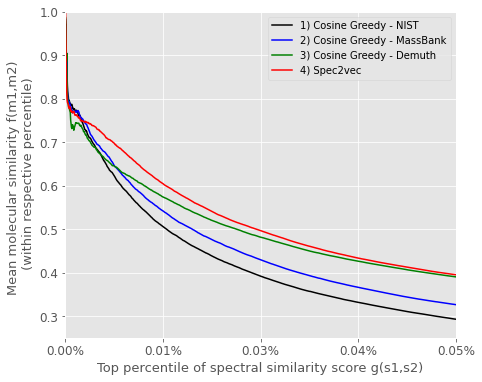

Iteration 10
The value of size is set from 300 (default) to 650
The value of workers is set from 4 (default) to 2
Saving model with name: /Users/efra/../../Volumes/easystore/spec2vec_gcms_data_analysis/data/testing-references_iter_10.model
Saving model with name: /Users/efra/../../Volumes/easystore/spec2vec_gcms_data_analysis/data/testing-references_iter_20.model
Saving model with name: /Users/efra/../../Volumes/easystore/spec2vec_gcms_data_analysis/data/testing-references.model


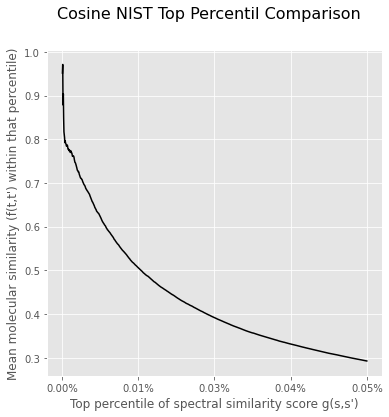

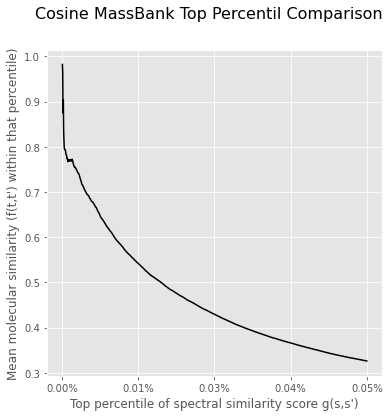

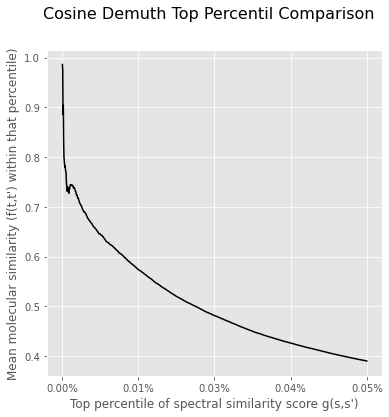

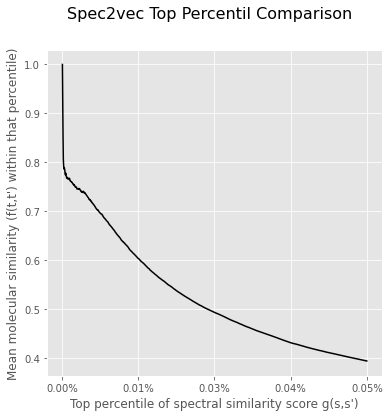

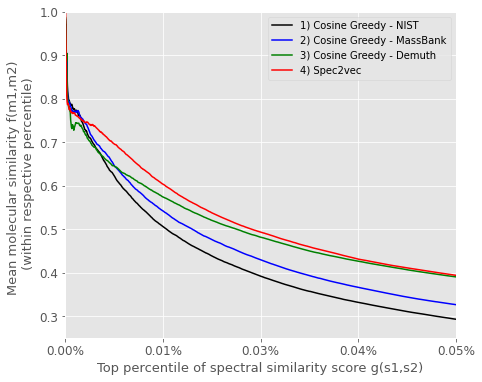

In [36]:
import gensim
from matchms import calculate_scores_parallel
from spec2vec import Spec2VecParallel
from spec2vec.model_building import train_new_word2vec_model
from custom_functions.plotting_functions import plot_precentile

for idx in range(10):
    print("Iteration " + str(idx+1))
    
    model_file = os.path.join(path, "testing-references.model")
    model = train_new_word2vec_model(documents=reference_documents, filename=model_file, 
                                     size=650, iterations=[10, 20, 30],
                                     workers=2, progress_logger=False)


    model = gensim.models.Word2Vec.load(model_file)

    # Define similarity_function
    spec2vec = Spec2VecParallel(model=model, intensity_weighting_power=0.5,
                                allowed_missing_percentage=5.0)

    matrix_similarities_spec2vec = []
    matrix_similarities_spec2vec = spec2vec(reference_documents, query_documents)

    show_top_percentile = 0.05

    percentile_cosine_nist = plot_precentile(matrix_similarities_tanimoto, matrix_similarities_nist, show_top_percentile=show_top_percentile, title="Cosine NIST Top Percentil Comparison", ignore_diagonal=True)
    percentile_cosine_massbank = plot_precentile(matrix_similarities_tanimoto, matrix_similarities_massbank, show_top_percentile=show_top_percentile, title="Cosine MassBank Top Percentil Comparison", ignore_diagonal=True)
    percentile_cosine_demuth = plot_precentile(matrix_similarities_tanimoto, matrix_similarities_demuth, show_top_percentile=show_top_percentile, title="Cosine Demuth Top Percentil Comparison", ignore_diagonal=True)
    percentile_cosine_spec2vec = plot_precentile(matrix_similarities_tanimoto, matrix_similarities_spec2vec, show_top_percentile=show_top_percentile, title="Spec2vec Top Percentil Comparison", ignore_diagonal=True)

    plot_similarity_algorithms_performance(show_top_percentile, percentile_cosine_nist, percentile_cosine_massbank, percentile_cosine_demuth, percentile_cosine_spec2vec)